# Machine Learning Engineer Nanodegree             ** Capstone Project**
                                                                            
                                          ** Appliance Energy Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# seed value to be used whenever required
seed = 79
np.random.seed(seed)

### Read the data

In [2]:
energy = pd.read_csv(".\\datasets\\training.csv")

In [3]:
#first 5 rows
energy.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances
0,20.20,37.500000,17.823333,39.300000,20.29,36.560000,18.200000,37.290000,17.926667,47.633333,...,35.663333,18.100000,35.500000,2.800000,744.000000,86.666667,2.666667,28.000000,0.766667,70
1,20.00,42.700000,19.100000,42.466667,20.79,44.500000,17.790000,43.790000,17.594444,54.400000,...,53.450000,16.890000,50.000000,4.633333,754.233333,94.333333,4.000000,26.000000,3.800000,40
2,20.60,36.833333,17.500000,40.223333,21.60,34.863333,20.390000,35.363333,19.290000,47.993333,...,38.466667,19.200000,37.633333,3.033333,750.666667,94.666667,3.166667,60.833333,2.200000,70
3,22.39,39.090000,19.890000,41.000000,24.89,37.045000,22.290000,35.652857,20.815000,53.617500,...,46.400000,20.500000,40.466667,7.266667,756.850000,88.333333,4.000000,30.000000,5.466667,60
4,20.20,40.526667,18.390000,41.363333,21.00,39.700000,20.823333,39.500000,17.878889,49.988889,...,43.983333,18.133333,42.433333,2.700000,736.300000,95.000000,2.000000,36.000000,2.000000,110


## Exploratory Analysis

In [53]:
# Dataset characteristics
print("Number of cases in dataset = {}".format(energy.shape[0]))
print("Total # columns = {}".format(energy.columns.shape[0]))
print("count of null values:-")
print(energy.isnull().sum())

Number of cases in dataset = 14801
Total # columns = 25
count of null values:-
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
Appliances     0
dtype: int64


Therefore,  no missing values in any columns.

### Column wise statistics

In [5]:
# Columns for temp sensors
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

# Columns for humid sensors
rho_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

# Columns for weather 
weather_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]

# Target variable
target = ["Appliances"]

In [6]:
energy[temp_cols].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.691343,20.344518,22.278802,20.860393,19.604773,7.923216,20.273236,22.028122,19.493479
std,1.615790,2.202481,2.012934,2.048076,1.849641,6.117495,2.118416,1.960985,2.022560
min,16.790000,16.100000,17.200000,15.100000,15.340000,-6.065000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.533333,18.290000,3.626667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.075000,22.111111,19.390000
75%,22.633333,21.500000,23.340000,22.100000,20.653889,11.226667,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000


In [7]:
energy[rho_cols].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,40.267556,40.434363,39.243995,39.043799,51.014065,54.615000,35.410874,42.948244,41.556594
std,3.974692,4.052420,3.245701,4.333479,9.107390,31.160835,5.097243,5.210450,4.161295
min,27.023333,20.596667,28.766667,27.660000,29.815000,1.000000,23.260000,29.600000,29.166667
25%,37.363333,37.900000,36.900000,35.560000,45.433333,29.996667,31.500000,39.096667,38.530000
50%,39.693333,40.500000,38.560000,38.433333,49.096000,55.267500,34.900000,42.390000,40.900000
75%,43.066667,43.273453,41.730000,42.200000,53.773333,83.226667,39.000000,46.500000,44.326667
max,63.360000,54.766667,50.163333,51.090000,96.321667,99.900000,51.327778,58.780000,53.326667


In [8]:
energy[weather_cols].describe()

,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,7.421836,3.782509,79.824197,755.480135,4.029001,38.290284
std,5.343737,4.194994,14.901776,7.389218,2.448171,11.789650
min,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000
25%,3.666667,0.933333,70.500000,750.900000,2.000000,29.000000
50%,6.933333,3.483333,83.833333,756.000000,3.666667,40.000000
75%,10.433333,6.600000,91.666667,760.833333,5.500000,40.000000
max,26.100000,15.316667,100.000000,772.300000,14.000000,66.000000


In [9]:
energy[target].describe()

,Appliances
count,14801.000000
mean,97.875144
std,102.314986
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


### Observations

* Temperature ranges for all home sensors is between 14.89℃ to 29.86℃ except for T6 for which it is -6.06℃ to 28.29℃. The reason for such low readings is that the sensor is kept outside.
* Similarly, humudity ranges for all home sensors is between 20.60`%` to 63.36%. Except for RH_5 and RH_6, whose ranges are 29.82`%` to 96.32`%` and 1`%` to 99.9`%` respectively.
    * The reason behind this is that RH_5 is inside the bathroom,
    * And RH_6 is outside the building, explaining the high humidity values.
* One interesting observation can be seen in `Appliances` column that although the max consumption is 1080`Wh`, 75`%` of values are less than 100`Wh`. This shows that there are fewer cases when Appliance energy consumption is very high.

## Exploratory Visualization

### Correlation plots

#### Temperature sensors

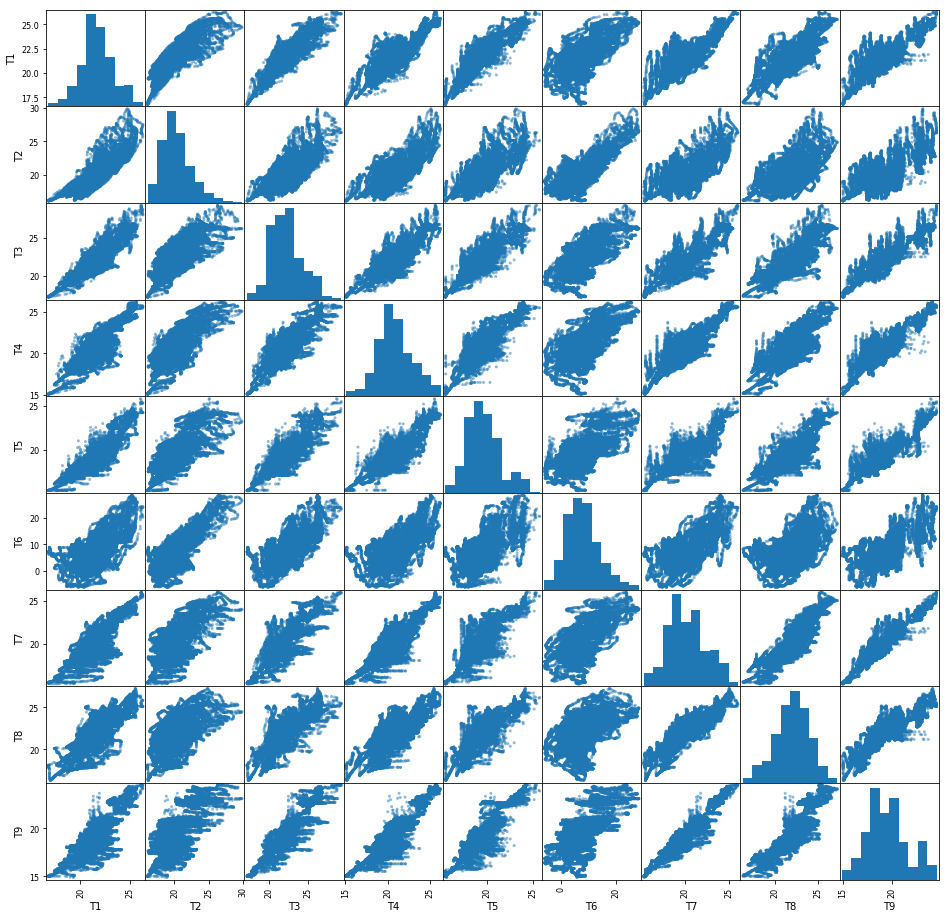

In [10]:
temp_scatter = pd.plotting.scatter_matrix(energy[temp_cols], figsize=(16, 16))

We can see that there is a significant correlation between the columns `T7` and `T9`. We will check this correlation statistically in later section. Let's check the plot between these two columns once more.

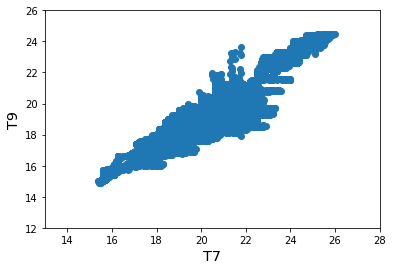

In [11]:
plt.xlabel("T7", fontsize='x-large')
plt.ylabel("T9", fontsize='x-large')

plt.xlim(int(energy.T7.min()) - 2, int(energy.T7.max()) + 2)
plt.ylim(int(energy.T9.min()) - 2, int(energy.T9.max()) + 2)

plt.scatter(energy["T7"], energy["T9"])

#### Humidity sensors

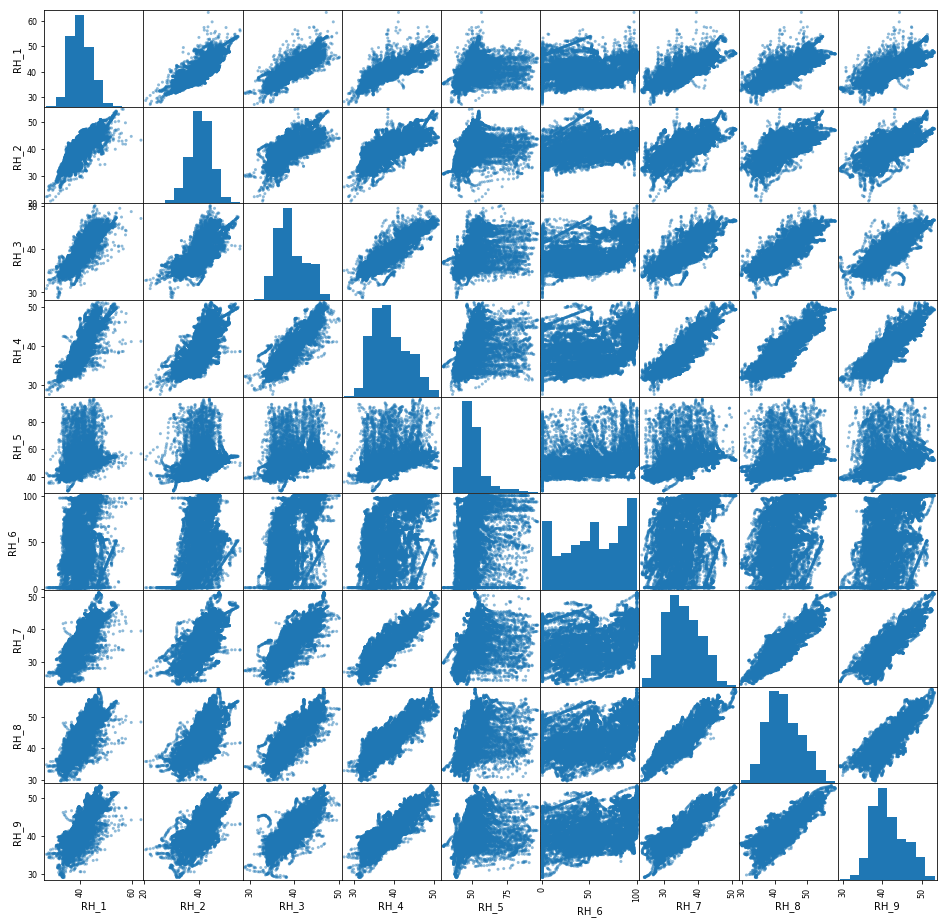

In [12]:
rho_scatter = pd.plotting.scatter_matrix(energy[rho_cols], figsize=(16, 16))

No significant correlation among for humidity sensors.

#### Weather data

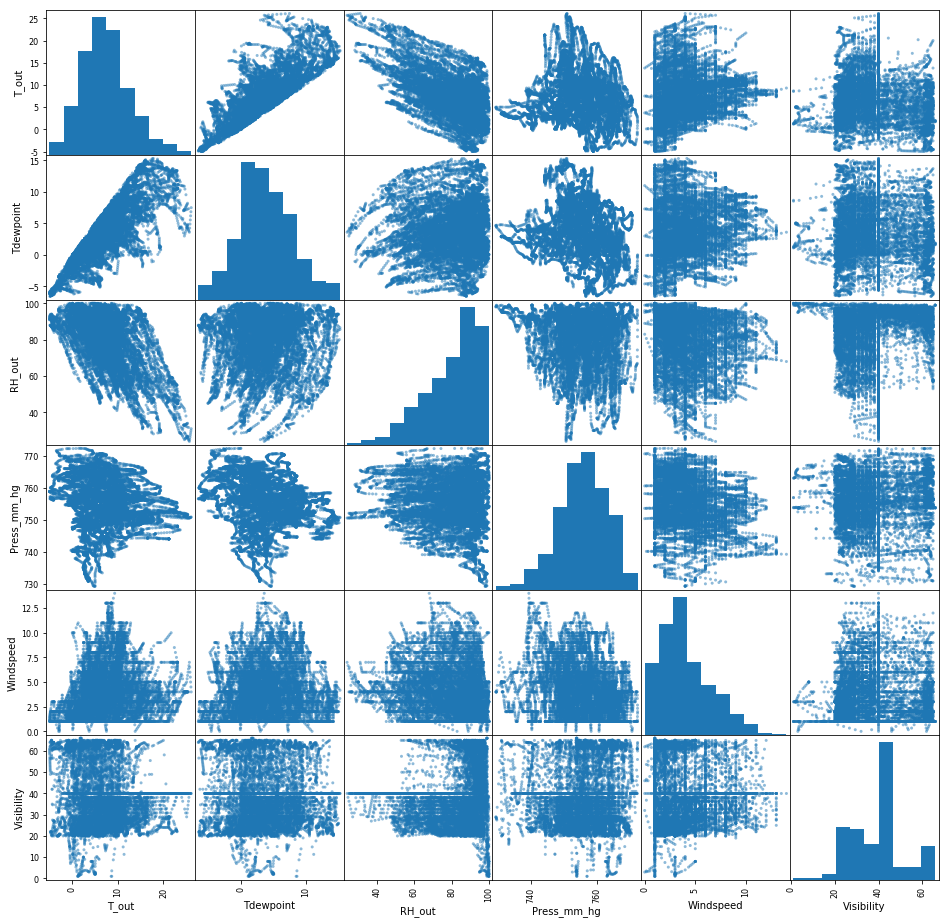

In [13]:
weather_scatter = pd.plotting.scatter_matrix(energy[weather_cols], figsize=(16, 16))

We can see here that the features of weather data are uncorrelated to one another.

### Histogram for each column

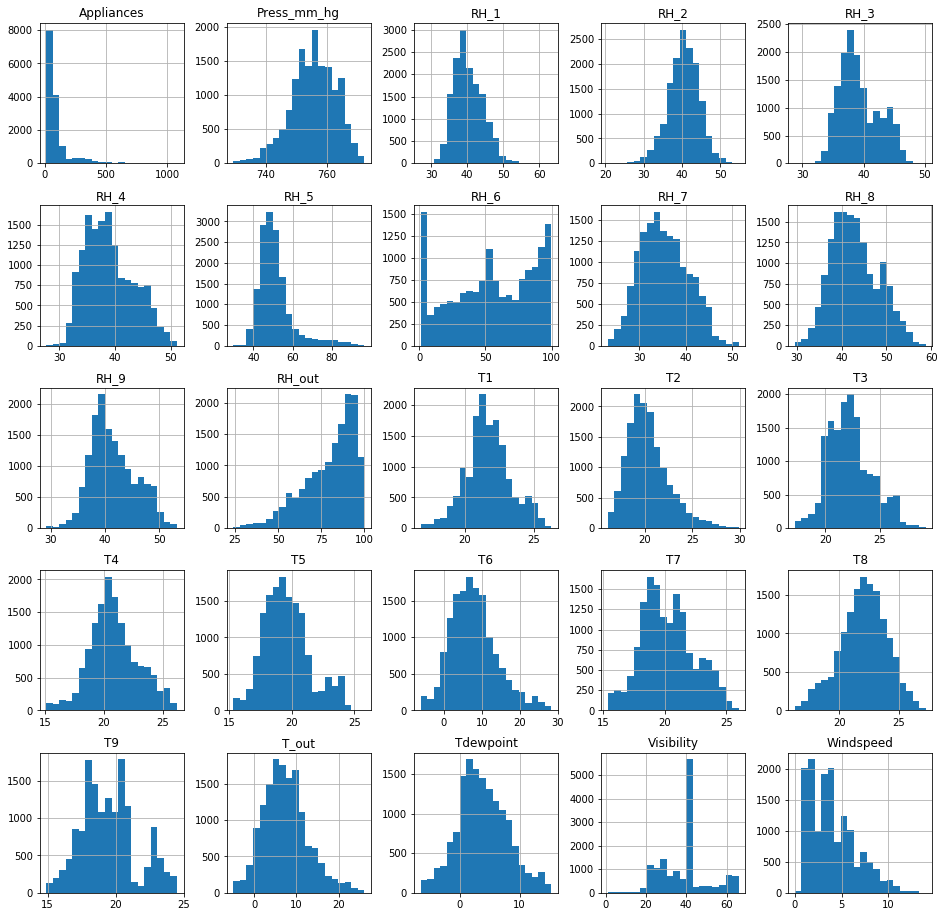

In [14]:
histograms = energy.hist(figsize=(16, 16), bins=20)

It can be observed from Histograms that:-
* All humidity values except `RH_6` and `RH_out` follow a Normal distribution. That is, all the readings from sensors inside the home are from a Normal distribution.
* Similarly, all temperature readings follow a Normal distribution except for `T9`.
* Out of the remaining columns, we can see that `Visibility`, `Windspeed` and **`Appliances`** are skewed.
* Also, there is no similarity between our target variable, **`Appliances`** and the remaining 24 columns. `Windspeed` looks similar but the number of observations are different as seen from the y-axes of both plots.

Let's confirm this by plotting **`Appliances`** against `Windspeed`.
Also, let's plot **`Appliances`** histogram separately to get better idea about it's distribution.

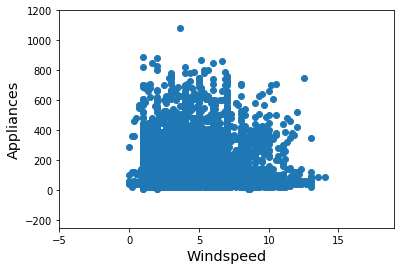

In [15]:
plt.xlabel("Windspeed", fontsize='x-large')
plt.ylabel("Appliances", fontsize='x-large')

plt.xlim(-5, energy.Windspeed.max() + 5)
plt.ylim(-250, 1200)

plt.scatter(energy["Windspeed"], energy["Appliances"])

Hence, it is confirmed that `Windspeed` does not share a linear relationship with **`Appliances`** column.

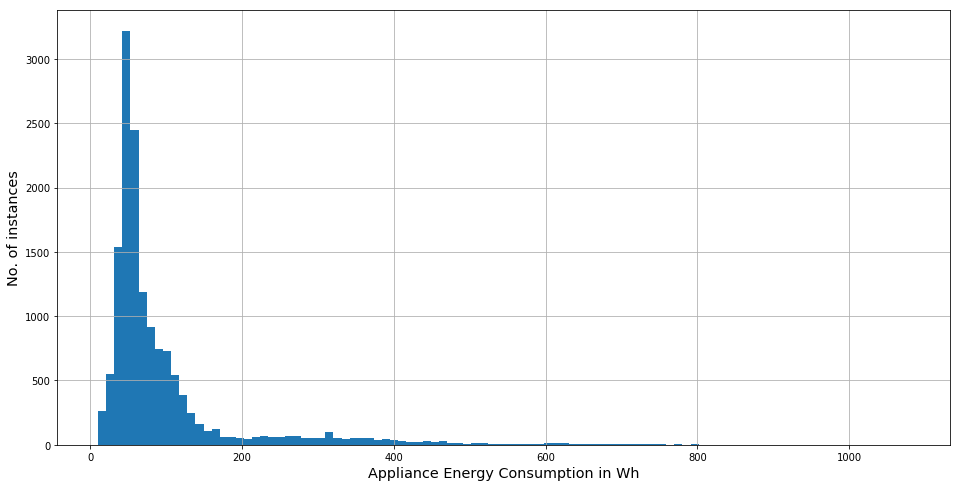

In [16]:
# Histogram for appliances

plt.xlabel("Appliance Energy Consumption in Wh", fontsize="x-large")
plt.ylabel("No. of instances", fontsize="x-large")

energy["Appliances"].hist(figsize=(16, 8), bins=100)

We can see that most values are in the range of 0-200 `Wh`, strengthening our assumption that there are few cases of high energy consumption. The percentage of values within this range is calculated below.

In [55]:
print("Percentage of dataset in range of 0-200 Wh")
print("{:.3f}%".format(
    (energy[energy.Appliances <= 200]["Appliances"].count()*100.0) / energy["Appliances"].count()
))

Percentage of dataset in range of 0-200 Wh
90.183%


Now let's check the correlation between `T7` and `T9`.

In [18]:
# Import pearson relation method from SciPy
from scipy.stats import pearsonr

# Calculate the coefficient and p-value
corr_coef, p_val = pearsonr(energy["T7"], energy["T9"])
print("Correlation coefficient : {}".format(corr_coef))
print("p-value : {}".format(p_val))

Correlation coefficient : 0.9460586115166221
p-value : 0.0


We can see that there is a very high degree of positive correlation between this two columns. Also, p-value is less than 0.01. Thereofore, we can reject the `null hypothesis` that this two columns don't affect each other.

Let's manually calculate which column pairs have a high degree of correlation (> 0.9).

In [19]:
#  generate all pairs for given columns
from itertools import combinations

for pair in combinations(energy.columns, 2):
    col_1, col_2 = pair
    corr_coef, p_val = pearsonr(energy[col_1], energy[col_2])
    # Check for high correlation
    if corr_coef > 0.9 or corr_coef < -0.9:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : T3, T9
Correlation coefficient : 0.9009710955349393
p-value : 0.0
Column pair : T5, T9
Correlation coefficient : 0.9101631787384007
p-value : 0.0
Column pair : T6, T_out
Correlation coefficient : 0.9747835663815296
p-value : 0.0
Column pair : T7, T9
Correlation coefficient : 0.9460586115166221
p-value : 0.0


Interestingly, 3 columns have a high degree of correlation with `T9`, all of which have a p-value < 0.01. Therefore, `T9` can be considered as redundant.

Also, a very high correlation exists between features `T6` and `T_out`. This shouldn't be surprising as `T6` is reading from a temperature sensor kept outside the building and `T_out` is temperature obtained from Weather station.

Let's plot `T6` and `T_out` to get a detailed visualization.

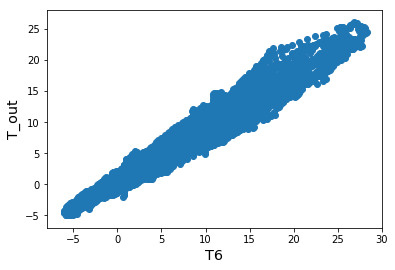

In [20]:
plt.xlabel("T6", fontsize='x-large')
plt.ylabel("T_out", fontsize='x-large')

plt.xlim(int(energy.T6.min()) - 2, int(energy.T6.max()) + 2)
plt.ylim(int(energy.T_out.min()) - 2, int(energy.T_out.max()) + 2)

plt.scatter(energy["T6"], energy["T_out"])

It is evident from the plot as well that these two features are highly correlated.

## Benchmark Model

For benchmark, I will use Linear regression, using all the features as input data and without scaling the dataset. This will give an idea about the improvements gained from:
* Performing feature scaling.
* Performing feature selection.
* Performing cross validation.
* Using more complex Regression algorithms.
* Hyper-parameter tuning of the regressor.

In [56]:
from sklearn.linear_model import LinearRegression
from time import time

# Prepare the data
X_train = energy.drop("Appliances", axis=1)
y_train = energy["Appliances"]

# Initialize and fit the model
benchmark_model = LinearRegression()
start = time()
benchmark_model.fit(X_train, y_train)
end = time()
print("Classifier fitted in {:.3f} seconds".format(end-start))

test = pd.read_csv(".//datasets//testing.csv")

# Prepare the data
X_test = test.drop("Appliances", axis=1)
y_test = test["Appliances"]
# Print scores on both
print("Score on training data : {:.3f}%".format(benchmark_model.score(X_train, y_train) * 100))
print("Score on testing data : {:.3f}%".format(benchmark_model.score(X_test, y_test) * 100))

Classifier fitted in 0.020 seconds
Score on training data : 14.687%
Score on testing data : 14.258%


## Data Preprocessing

In [22]:
# Remove correlated features T6 and T9
train = energy.drop(["T6", "T9"], axis=1)
test.drop(["T6", "T9"], axis=1, inplace=True)

In [23]:
# Import scaler
from sklearn.preprocessing import StandardScaler
# Scales the data to zero mean and unit variance
standard_scaler = StandardScaler()

In [24]:
# Create dummy dataframes to hold the scaled train and test data
train_scaled = pd.DataFrame(columns=train.columns, index=train.index)
test_scaled = pd.DataFrame(columns=test.columns, index=test.index)

In [25]:
# Store the scaled data in new dataframes
train_scaled[train_scaled.columns] = standard_scaler.fit_transform(train)
test_scaled[test_scaled.columns] = standard_scaler.fit_transform(test)

C:\Users\satta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\satta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\satta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\satta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
# Prepare training and testing data
X_train = train_scaled.drop("Appliances", axis=1)
y_train = train_scaled["Appliances"]

X_test = test_scaled.drop("Appliances", axis=1)
y_test = test_scaled["Appliances"]

### Algorithms to be used

Regularized Linear models as an improvement over Linear Regression.

* Ridge Regression
* Lasso Regression

Ensemble based Tree Regression models to deal robustly with outlier data and large number of features.

* Random Forests
* Gradient  Boosting
* Extra Trees

Neural networks for exploring non linear relationships between features and target.

* Multi-Layer Preceptron

### Model Implementation

In [57]:
# To calculate Root mean squared error
from sklearn.metrics import mean_squared_error
# Function to fit the regressor and record its metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    # Dictionary to hold the properties
    reg_props = {}
    
    # Initialize and fit the regressor while recording the time taken for fitting
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train, y_train)
    end = time()
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    
    return reg_props

In [28]:
# Import the required Regression algorithms
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        Lasso,
        RandomForestRegressor,
        GradientBoostingRegressor,
        ExtraTreesRegressor,
        MLPRegressor
    ] 
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train, y_train, X_test, y_test, random_state=seed)
        props.append(properites)
        
    return props

In [29]:
# Consolidate the properties into a DataFrame
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training times": train_times,
                            "Training scores": train_scores,
                            "Testing scores": test_scores,
                            "RMSE": rmse_vals
                      }
                  )
    
    return df

In [30]:
# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()

C:\Users\satta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\satta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Visualizing Performance

In [31]:
# Calculate RMSE for the Benchmark model

test_data = pd.read_csv(".//datasets//testing.csv")

data = standard_scaler.fit_transform(energy)
test_data = standard_scaler.fit_transform(test_data)

X = data[:, :-1]
y = data[:, -1]
X_t = test_data[:, :-1]
y_t = test_data[:, -1]

# Fit the model
start = time()
benchmark_model.fit(X, y)
end = time()
# Append the peoperties of Benchmark model to the DataFrame
# storing the properties of selected models
properties = pd.concat(
    [properties,
    pd.Series(
    {
        "RMSE": np.sqrt(mean_squared_error(y_t, benchmark_model.predict(X_t))),
        "Training scores": benchmark_model.score(X, y),
        "Testing scores" :benchmark_model.score(X_t, y_t),
        "Training times": end - start,
        "Name": "Linear Regression (Benchmark)"
    }
    ).to_frame().T.set_index(["Name"])]
)

properties

C:\Users\satta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\satta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\satta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\satta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\satta\AppData\L

,RMSE,Testing scores,Training scores,Training times
Ridge,0.936121,0.123677,0.137409,0.400023
Lasso,1,0,0,0.0400023
RandomForestRegressor,0.728899,0.468707,0.913055,4.12824
GradientBoostingRegressor,0.86821,0.246212,0.331539,2.90517
ExtraTreesRegressor,0.664811,0.558027,1,1.19307
MLPRegressor,0.813745,0.337819,0.448612,25.4125
Linear Regression (Benchmark),0.926026,0.142476,0.146873,0.0140009


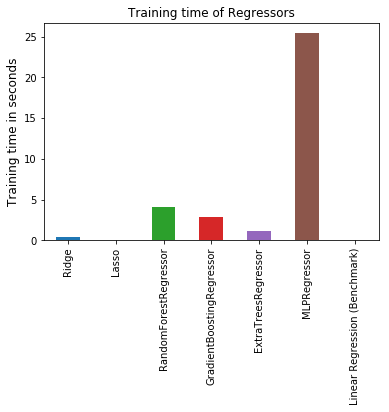

In [32]:
# Plot to compare the training time of algorithms
plt.ylabel("Training time in seconds", fontsize="large")
properties["Training times"].plot(kind="bar", title="Training time of Regressors")

* Fastest Regressor to train - Linear, Ridge and Lasso Regressors
* Slowest Regressor to train - Multi Layer Perceptron

Text(0, 0.5, 'R2 Score/ RMSE')

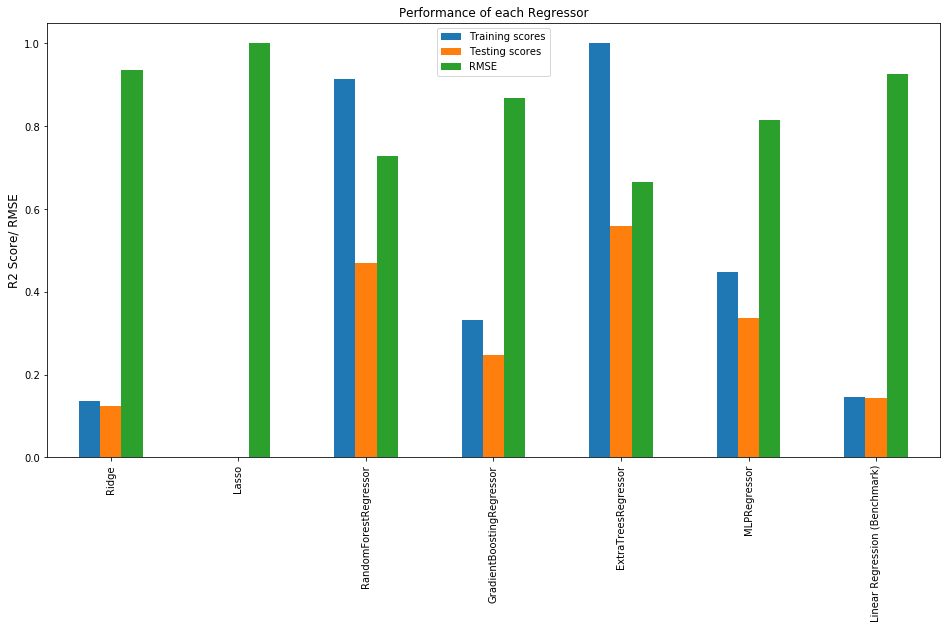

In [33]:
# Plot to compare the performance of the algorithms on both datasets
ax= properties[["Training scores", "Testing scores", "RMSE"]].plot(kind="bar", title="Performance of each Regressor", figsize=(16, 8))
ax.set_ylabel("R2 Score/ RMSE", fontsize="large")

* Least performing Regressor - Lasso Regressor
* Best performing Regressor - Extra Trees Regressor


Even though Extra Trees Regressor has a R2 score of 1.0 on traininig set, which might suggest overfitting but, it has the highest score on test set and also, it's RMSE value is also the lowest. Clearly, ExtraTreesRegressor is the best model out of given models.

### Hyperparameter Tuning

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the best performing regressor
clf = ExtraTreesRegressor(random_state=seed)

# Define the parameter subset
param_grid = {
    "n_estimators": [10, 50, 100, 200, 250],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 10, 50, 100, 200, 500]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=20, scoring="r2", cv=5, n_jobs=-1, verbose=2, random_state=seed)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=79, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [10, 50, 100, 200, 250], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 10, 50, 100, 200, 500]},
          pre_dispatch='2*n_jobs', random_state=79, refit=True,
          return_train_score='warn', scoring='r2', verbose=2)

### Review

In [35]:
# best params
print("Params of best Regressor : {}".format(grid_search.best_params_))

Params of best Regressor : {'n_estimators': 250, 'max_features': 'log2', 'max_depth': None}


In [36]:
best_model = grid_search.best_estimator_

# Display metrics on training and test set
print("R2 score on Training set = {:.3f}".format(best_model.score(X_train, y_train)))
print("RMSE on Training set = {:.3f}".format(np.sqrt(mean_squared_error(y_train, best_model.predict(X_train)))))
print("R2 score on Testing set = {:.3f}".format(best_model.score(X_test, y_test)))
print("RMSE on Testing set = {:.3f}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))

R2 score on Training set = 1.000
RMSE on Training set = 0.000
R2 score on Testing set = 0.610
RMSE on Testing set = 0.624


**R2 score improvement from Benchmark model = 0.467.** <br>
**RMSE improvement from Benchmark model = 0.302.**     <br>
**R2 score improvement from Untuned model = 0.058.**   <br>
**RMSE improvement from Untuned model = 0.041.**

#### Feature Analysis

In [37]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(X_train.columns[np.argmax(best_model.feature_importances_)]))
print("Least important feature = {}".format(X_train.columns[np.argmin(best_model.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(best_model.feature_importances_)

print("\nTop 5 most features :-")
# Reverse the array to get important features at the beginning
for index in feature_indices[::-1][:5]:
    print(X_train.columns[index])
    
print("\nTop 5 least features:-")
for index in feature_indices[:5]:
    print(X_train.columns[index])

Most important feature = RH_1
Least important feature = Visibility

Top 5 most features :-
RH_1
T3
RH_out
RH_8
Press_mm_hg

Top 5 least features:-
Visibility
T4
T1
Windspeed
RH_9


Text(0, 0.5, 'Values')

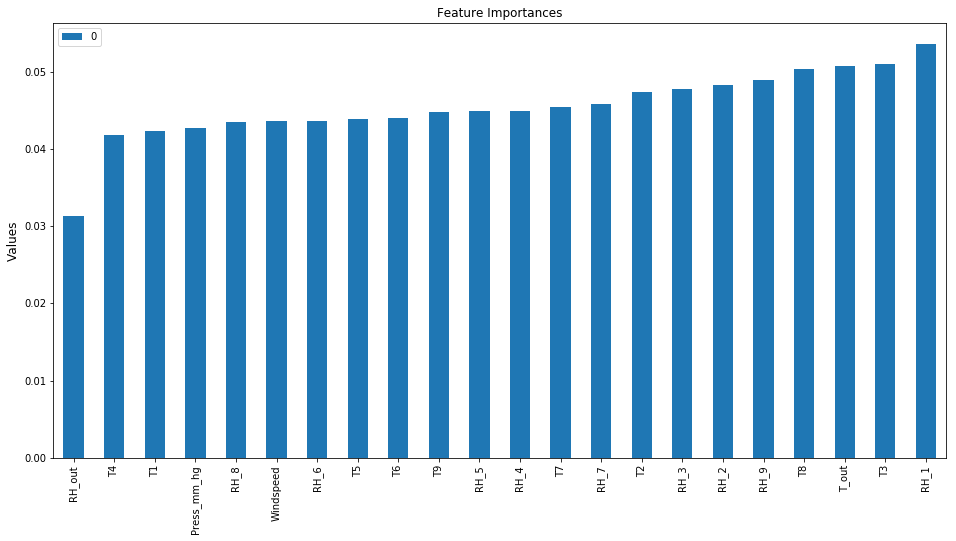

In [58]:
# Plot feature importance

fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))

ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")

In [39]:
# Constructing data set from reduced feature space
X_train_reduced = X_train[X_train.columns[feature_indices[::-1][:5]]]
X_test_reduced = X_test[X_test.columns[feature_indices[::-1][:5]]]

In [40]:
from sklearn.base import clone

# Clone the best model
reg_best = clone(best_model)
# Fit the model on reduced data set 
reg_best.fit(X_train_reduced, y_train)
print("R2 Score on testing dataset = {:.3f}".format(reg_best.score(X_test_reduced, y_test)))
print("RMSE Score on testing dataset = {:.3f}".format(np.sqrt(mean_squared_error(y_test, reg_best.predict(X_test_reduced)))))

R2 Score on testing dataset = 0.499
RMSE Score on testing dataset = 0.708


Difference in R2 score = 0.111 or 11.1% loss of explained variance. <br>
Increase in RMSE = 0.084

This is a very high difference and hence we cannot reduce the feature space for final model.

## Conclusion

* Best Algorithm = Extra Trees Regressor
* Variance explained on test set = 61`%`.
* Improvement from benchmark model in terms of percentage of variance explained:-
    * Training data = 85.3`%`
    * Test data = 46.7`%`
* No. of features used in final model = 22.